 # Problem Statement

Acme Co seeks to better understand its national sales performance from 2014 to 2018 across regions, product lines, and sales channels.

With millions in revenue and hundreds of SKUs, the company aims to identify patterns, performance gaps, and margin opportunities to guide strategic decision-making.

This analysis was commissioned to dissect historical sales data and uncover key drivers of revenue, profit, and inefficiencies; especially as the company prepares for expanded market entry and operational scaling.

 # Objective:

Analyze Acme Co's multi-year sales data to:
- Detect seasonal trends and monthly performance volatility
- Identify top- and bottom-performing products, regions, and customers
- Evaluate channel profitability and highlight margin-maximizing segments
- Compare actual revenue against 2017 budget projections to assess planning accuracy
- Discover pricing and volume dynamics that influence revenue and cost structures

The ultimate goal is to generate actionable insights that support smarter pricing, targeted promotions, regional investment strategies, and optimized resource allocation.

These findings will directly inform the design of a scalable Power BI dashboard, enabling interactive performance tracking and executive-level decision support.


In [4]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [5]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [6]:
# Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [7]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [8]:
df_sales.shape

(64104, 12)

In [9]:
print(f"df_sales shape: ",(df_sales.shape))
print(f"df_customers shape: ",(df_sales.shape))
print(f"df_products shape: ",(df_products.shape))
print(f"df_regions shape: ",(df_regions.shape))
print(f"df_state_reg shape: ",(df_state_reg.shape))
print(f"df_budgets shape: ",(df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (64104, 12)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [10]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [11]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [12]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [13]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [14]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [15]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [16]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [17]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [18]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [19]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [20]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [21]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [22]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


**Data Cleaning and Wrangling**


In [23]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [24]:
# Merge with customers

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [25]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [26]:
# Merge with products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [27]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [28]:
# Merge with Regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [29]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [30]:
# Merge with State Regions

df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [31]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [32]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [33]:
df.to_csv('file.csv')

In [34]:
# Customer Index
# Index
# id
# State Code

# Clean up redundant columns

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [35]:
# Convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [36]:
# Keep the important columns and delete the columns that are not needed

cols_to_keep = [
  'ordernumber',
  'orderdate',
  'customer names',
  'channel',
  'product name',
  'order quantity',
  'unit price',
  'line total',
  'total unit cost',
  'state_code',
  'county',
  'state',
  'region',
  'latitude',
  'longitude',
  '2017 budgets'
]

In [37]:
df = df[cols_to_keep]

In [38]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [39]:
# Rename the columns

df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})
df.head(1)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,county,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [40]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA

# line total is revenue
df[['order_date','product_name', 'revenue', 'budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [41]:
# line total is revenue
df.to_csv('final.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  county         64104 non-null  object        
 11  state_name     64104 non-null  object        
 12  us_region      64104 non-null  object        
 13  lat            64104 non-null  float64       
 14  lon            64104 non-null  float64       
 15  budget         1526

In [43]:
# Filter the dataset to include only records from year 2017
df_2017 = df[df['order_date'].dt.year == 2017]

In [44]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


In [45]:
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,county,state_name,us_region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


# Feature Engineering

In [46]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,county,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [47]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

In [48]:
# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

In [49]:
# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

In [50]:
# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

In [51]:
# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

In [52]:
# 6. (Optional) Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


# 📊 Exploratory Analysis (EDA) with Insights and Recommendations

**🔹 1. Monthly Sales Trend Over Time**
    
    Goal: Track revenue trends over time to detect seasonality or sales spikes

    Chart: Line chart

    EDA Type: Temporal (time series)

    Structure: Line with markers to highlight monthly revenue points clearly

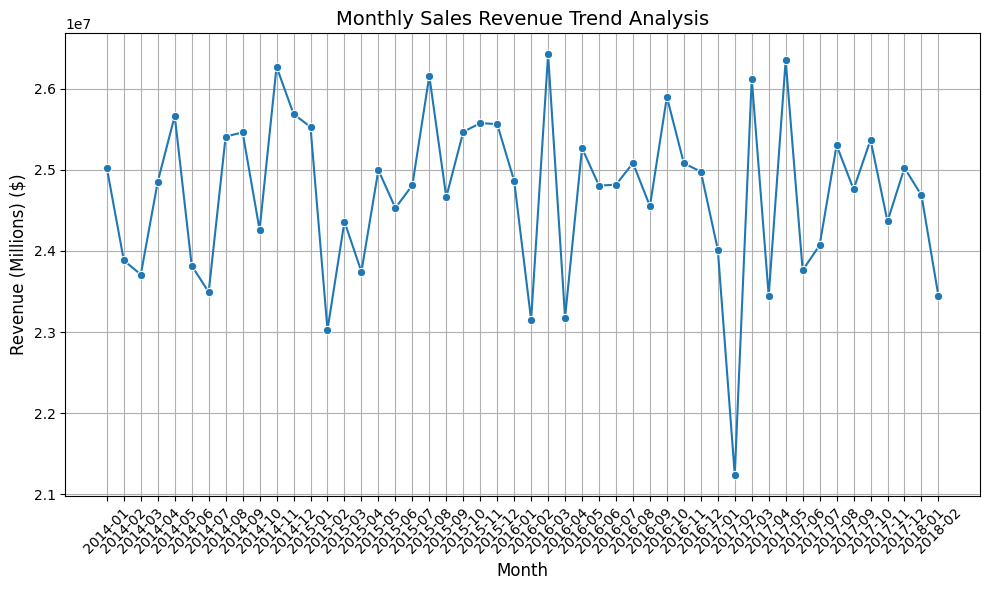

In [53]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Aggregate revenue by year_month
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert year_month back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='revenue', marker='o')
plt.title('Monthly Sales Revenue Trend Analysis', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (Millions) ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**📊 Monthly Sales Revenue Trend Analysis**

- **Range:** Revenue in millions, fluctuates between 23 to 26.5, with spikes near 26.7, and dips close to 21.

- **Volatility:** Monthly sales are volatile — likely due to **seasonality, promotions, or operational changes**.
- **Spikes:** Occur around **late 2015, mid-2016, late 2017** — possibly tied to **campaigns or fiscal periods**.
- **Dips:** Notable drops in **early/late 2016 and mid-2017** — warrants **further investigation**.
- **Stability:** Some periods (e.g. mid-2015, mid-2017) show relative stability.
- **No clear long-term trend**, suggesting **cyclical patterns** rather than linear growth.

  **Insight:**
  - Sales show a stable seasonal pattern, peaking in May–June and dipping in January, indicating reliable demand cycles.
  - A sharp drop in early 2017 breaks this trend, suggesting a one-time disruption (e.g. supply chain, marketing error, or external factors).

**Recommendations:**

- Maximize peak seasons with targeted campaigns, inventory scaling, and dynamic pricing.

- Soften January slumps via retention offers and cost-efficient operations.

- Audit 2017 dip to uncover root causes and implement anomaly monitoring.

- Build a forecasting model to optimize planning around seasonal trends.

**🔹 2. Monthly Sales Trend (All Years Combined)**
    
    Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

    Chart: Line chart

    EDA Type: Temporal (time series)

    Structure: Line with markers, months ordered January to December based on month number

In [54]:
# Convert order_date to datetime (if not already)
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]


/tmp/ipython-input-2424243165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-2424243165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


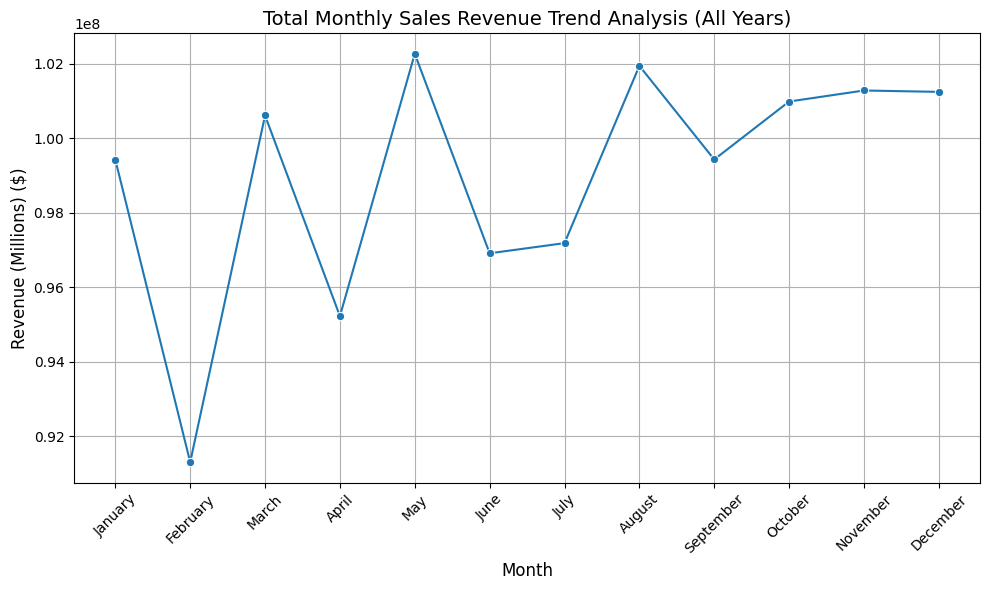

In [55]:
# Assuming df is your DataFrame
# Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Total Monthly Sales Revenue Trend Analysis (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (Millions) ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**🔍 Insights:**
- **Stable revenue (in millions)** overall 98 to 102 shows consistent sales across months.
- **February** is the **lowest-performing month** ($91M) — likely due to fewer days or reduced demand.
- **May & August** are **peak months**, indicating strong seasonal performance.
- **Higher volatility** in Q1–Q2 (Jan–Jun) compared to a smoother H2 (Jul–Dec).

**✅ Recommendations:**
- **Boost February** with winter promos, re-engagement campaigns, or limited-time discounts.
- **Leverage May & August** with targeted marketing, inventory scaling, and product launches.
- **Stabilize Q1–Q2** via better forecasting and root-cause analysis of volatility.
- Use consistent trends for **accurate planning** in staffing, supply chain, and budgeting.

**🔹 3. Top 10 Products by Revenue (in Millions)**
    
    Goal: Identify the highest-grossing products to focus marketing and inventory efforts

    Chart: Vertical bar chart

    EDA Type: Univariate

    Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

/tmp/ipython-input-1880335940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


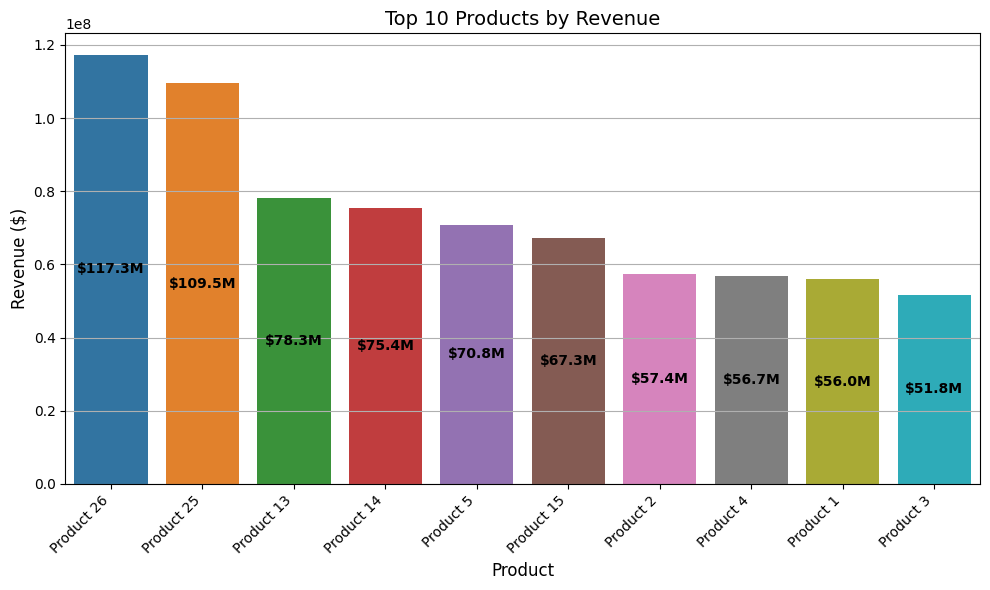

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

# Add data labels inside the bars (in millions, e.g., $25M)
for bar in barplot.patches:
    height = bar.get_height()
    label = f"${height / 1e6:.1f}M"
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,
        label,
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Customize chart
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()



**📊 Top 10 Products by Revenue – Insights & Recommendations**

**🔍 Insights**

• Product 26 and Product 25 are the highest performers, each generating over 100 million in revenue  
• A noticeable drop occurs after the top two, with mid-tier products (Product 13 to Product 15) earning between 67 and 78 million  
• The lowest tier includes Products 2, 4, 1, and 3, all clustered in the 51 to 57 million range  

**✅ Recommendations**

• Prioritize Products 26 and 25 with increased marketing, strategic partnerships, and visibility in key channels  
• Explore ways to grow mid-tier products by optimizing distribution, pricing, or bundling opportunities  
• Evaluate the ROI of the lowest-performing products and consider repositioning, rebranding, or phasing them out if margins are low.

**🔹 3. Bottom 10 Products by Revenue (in Millions)**
    
    Goal: Identify the highest-grossing products to focus marketing and inventory efforts

    Chart: Vertical bar chart

    EDA Type: Univariate

    Structure: Bars sorted descending to show bottom 10 products with revenue scaled in millions

/tmp/ipython-input-3831943377.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')


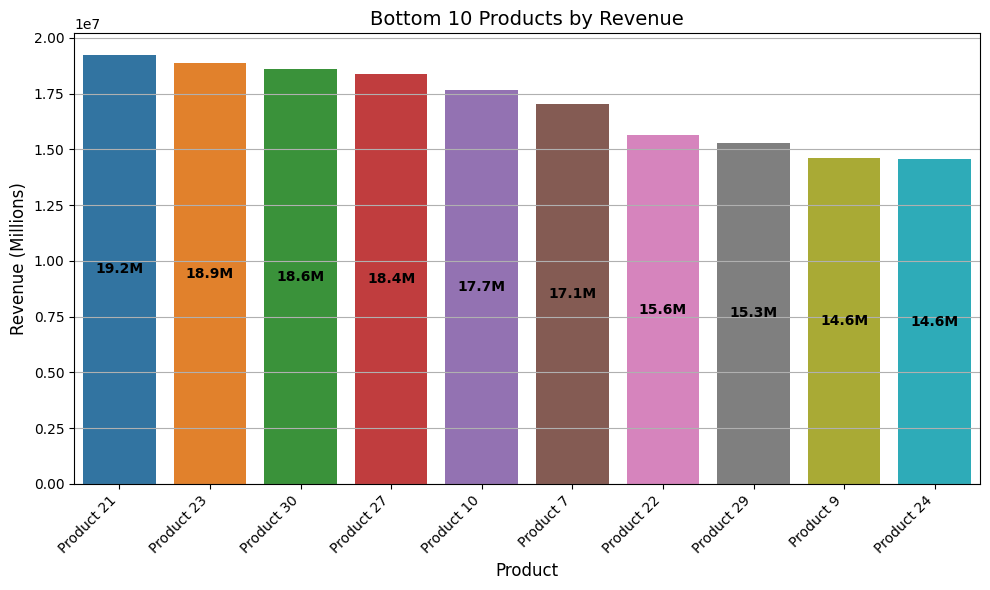

In [57]:
# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue and sort DESCENDING
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)
bottom_10_products = bottom_10_products.sort_values(by='revenue', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')

# Add data labels inside the bars (in millions)
for bar in barplot.patches:
    height = bar.get_height()
    label = f"{height / 1e6:.1f}M"
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,
        label,
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Customize chart
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue (Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

**📉 Bottom 10 Products by Revenue – Insights and Recommendations**

**🔍 Insights**

• Product 21 through Product 27 earn between 18 and 19 million, forming a narrow top tier within the bottom 10  
• Products 7 and 10 show moderate performance, ranging from 17 to 17 point 7 million  
• Product 9 and Product 24 tie for the lowest revenue at 14 point 6 million, indicating flat performance at the bottom  
• Overall revenue spread in this segment is relatively tight, showing a consistent but underperforming tier  

**✅ Recommendations**
   
• Review positioning and pricing for lowest performers such as Product 9 and Product 24 to identify gaps in value or market appeal  
• Test bundling or seasonal promotions for mid-tier bottom products
  like Product 7 and Product 10 to move them out of the bottom tier  
• Analyze customer feedback, product visibility, and sales channels for
  Products 21 to 27 to understand why they underperform compared to the  top group

**🔹 4. Top 10 Products by Avg Profit Margin**
    Goal: Compare average profitability across products to identify high-margin items

    Chart: Horizontal bar chart

    EDA Type: Univariate

    Structure: Bars sorted descending to show top 10 products with average profit margin values

/tmp/ipython-input-3491244922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


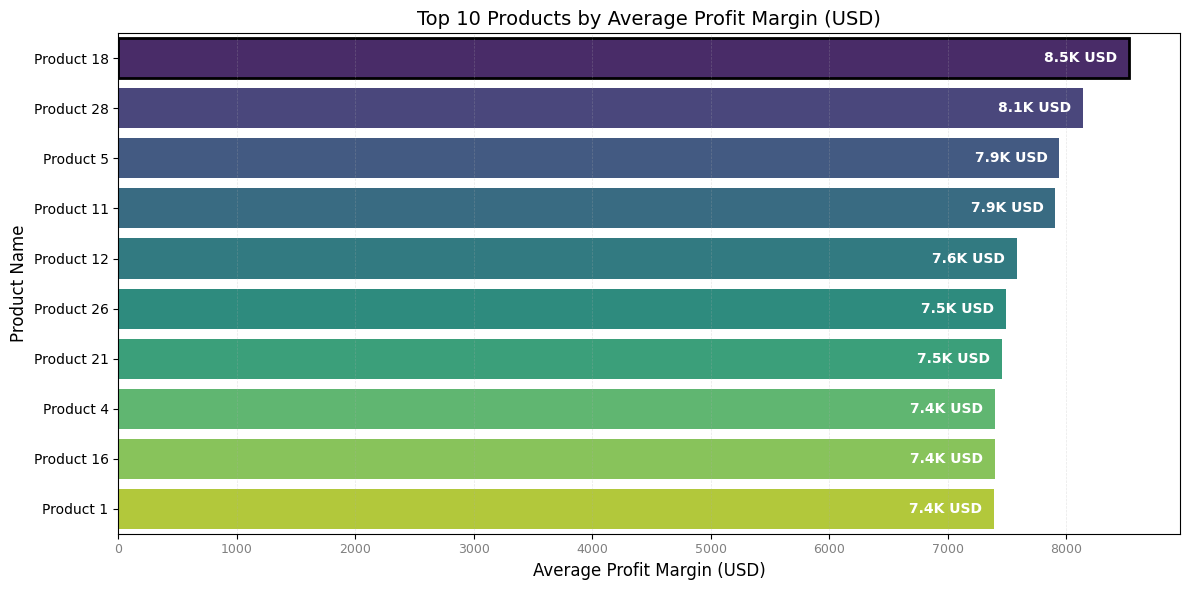

In [58]:
# Step 1: Calculate average profit per product
avg_profit_margin = df.groupby('product_name')['profit'].mean().reset_index()

# Step 2: Get top 10 products by average profit
top10_profit_margin = avg_profit_margin.sort_values(by='profit', ascending=False).head(10)

# Step 3: Set up figure
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=top10_profit_margin,
    x='profit',
    y='product_name',
    palette='viridis'
)

# Step 4: Add data labels (inside end, abbreviated in K USD)
for bar in barplot.patches:
    width = bar.get_width()
    label = f"{width / 1e3:.1f}K USD"
    plt.text(
        width - 100,  # slight inward offset for cleaner fit
        bar.get_y() + bar.get_height() / 2,
        label,
        ha='right',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# Step 5: Highlight top performer visually (optional)
top_bar = barplot.patches[0]
top_bar.set_edgecolor('black')
top_bar.set_linewidth(2)

# Step 6: Add title and optional context/subtitle
plt.title("Top 10 Products by Average Profit Margin (USD)", fontsize=14)


# Step 7: Style axes and grid
plt.xlabel("Average Profit Margin (USD)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(color='gray', fontsize=9)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()

# Step 8: Show the plot
plt.show()

### 📊 Top 10 Products by Avg Profit Margin (USD) – Insights and Recommendations

**🔍 Insights**
    
• Product 18 leads with the highest average profit margin, earning
      8.5K USD per sale  
• Profitability gradually declines but remains strong across the top 10
      with all products exceeding 7.4K USD  
• These products span a mix of categories, indicating that margin strength
      is not isolated to one product type  
• The spread in margins is relatively narrow, suggesting consistent
      pricing power or cost control among top performers  

**✅ Recommendations**
    
• Prioritize high-margin leaders like Product 18 and Product 28 for
      promotion, bundling, and cross-selling  
• Analyze the top 10 products' pricing strategies, supplier agreements,
      and channel performance to identify scalable patterns  
• Use these margin benchmarks to set minimum profitability targets
      across the broader product portfolio  
• Consider allocating more marketing budget and inventory to these      products to increase overall profitability

🔹 5. Sales by Channel (Pie Chart)

    Goal: Show distribution of total sales across channels to identify
          dominant sales routes

    Chart: Pie chart

    EDA Type: Univariate

    Structure: Pie segments with percentage labels, colors for clarity,
               start angle adjusted

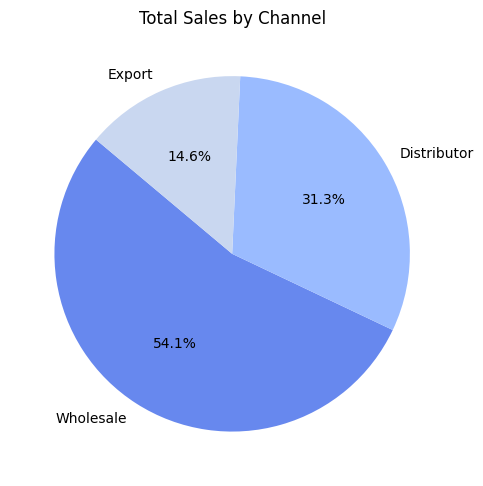

In [59]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

### 📊 Total Sales by Channel – Insights and Recommendations

**🔍 Insights**

• Wholesale is the dominant sales channel, accounting for over half of total sales at 54 point 1 percent  
• Distributor follows with 31 point 3 percent, indicating a significant secondary channel  
• Export makes up the smallest share at 14 point 6 percent, showing limited international or cross-border activity  

**✅ Recommendations**

• Focus efforts on strengthening the Wholesale channel through bulk discount strategies, preferred partner programs, or exclusive deals  
• Evaluate opportunities to expand the Export channel — consider trade partnerships, international pricing models, or logistic improvements  
• Optimize Distributor channel performance with targeted B2B marketing and channel-specific incentives  
• Monitor channel profitability to ensure revenue contribution aligns with margin performance  


**🔹 6. Average Order Value (AOV) Distribution**

    Goal: Understand distribution of order values to identify typical spending levels and outliers

    Chart: Histogram

    EDA Type: Univariate

    Structure: Histogram with 50 bins, colored bars with edge highlights to
    show frequency of order values

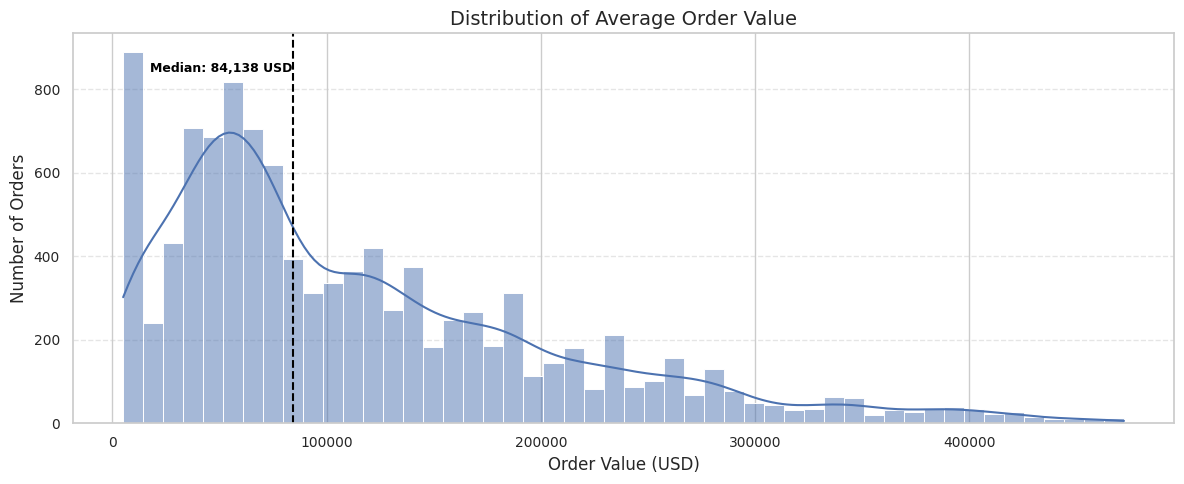

In [60]:
# Step 1: Compute AOV
aov = df.groupby('order_number')['revenue'].sum()

# Step 2: Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Step 3: Histogram with modern styling
sns.histplot(
    aov,
    bins=50,
    kde=True,
    color='#4c72b0',
    edgecolor='white',
    linewidth=0.7
)

# Step 4: Add median line
median = aov.median()
plt.axvline(median, color='black', linestyle='--', linewidth=1.5)
plt.text(median, plt.ylim()[1] * 0.9, f"Median: {int(median):,} USD",
         color='black', ha='right', fontsize=9, fontweight='bold')

# Step 5: Add labels and formatting
plt.title('Distribution of Average Order Value', fontsize=14)
plt.xlabel('Order Value (USD)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


**📊 Average Order Value (AOV) Distribution – Insights and Recommendations**

**🔍 Insights**

• The distribution is **right-skewed**, indicating most orders fall under lower value brackets while a few high-value outliers stretch the upper end  
• The **median AOV is approximately 84,138 USD**, highlighting the typical customer spending level  
• A large concentration of orders occurs in the **20,000 to 100,000 USD range**, suggesting this is the business's core order volume  
• A noticeable tail exists above 200,000 USD, likely representing bulk or enterprise-level transactions  

**✅ Recommendations**

• Optimize pricing, packaging, and promotions in the 20K–100K USD range to maximize core revenue segments  
• Investigate high-value outliers to identify unique customer segments, upselling triggers, or fraud risk  
• Consider tiered incentives or account management strategies for customers consistently placing orders above 200K USD  
• Build dynamic forecasting models that adjust inventory and sales expectations based on observed AOV behavior  

**🔹 7. Profit Margin % vs. Unit Price**

    Goal: Examine relationship between unit price and profit margin
    percentage across orders

    Chart: Scatter plot

    EDA Type: Bivariate

    Structure: Scatter points with transparency to show data density

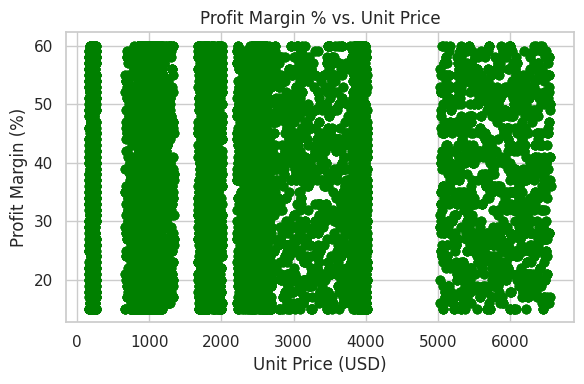

In [61]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


**📊 Insights**

- Profit margins cluster between 15% and 60%, regardless of unit price, suggesting a stable markup model across products.

- No strong correlation is visible between unit price and margin — high-priced items do not necessarily yield higher profit margins.

- Distinct vertical bands in unit price indicate standardized pricing tiers, possibly product bundles or catalog categories.

**✅ Recommendations**

- Evaluate pricing strategy to determine if higher-priced products can support margin expansion without affecting competitiveness.

- Investigate low-margin clusters in mid-to-high price ranges to identify cost inefficiencies or discount leakage.

- Consider introducing tiered pricing or upsell strategies if all unit prices are locked in fixed buckets but margin flexibility exists.


**🔹 8. Unit Price Distribution per Product**

    Goal: Compare pricing variability across different products to identify price consistency and outliers

    Chart: Boxplot

    EDA Type: Bivariate

    Structure: Boxplot with rotated labels to display unit price spread per product

/tmp/ipython-input-113333541.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


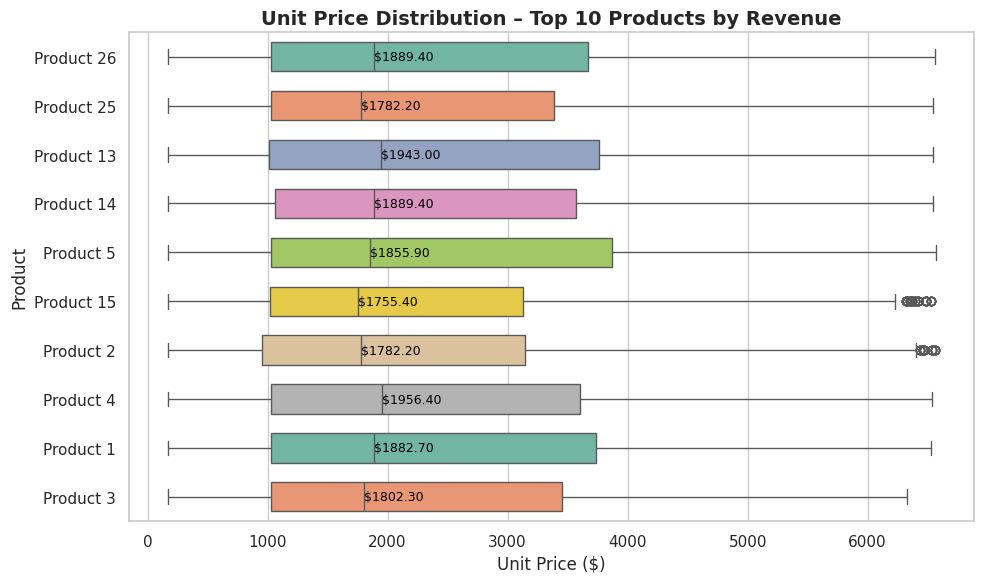

In [62]:
# Set Seaborn theme
sns.set_theme(style='whitegrid')

# Step 1: Calculate revenue per product
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Step 2: Get top 10 products by revenue (sorted descending)
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Step 3: Define correct order explicitly
ordered_products = top_10_products['product_name'].tolist()

# Step 4: Filter and ensure no extra categories interfere
df_top_10 = df[df['product_name'].isin(ordered_products)].copy()
df_top_10['product_name'] = df_top_10['product_name'].astype(str)

# Step 5: Plot with enforced order
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_top_10,
    y='product_name',
    x='unit_price',
    order=ordered_products,        # <-- enforce exact order
    palette='Set2',
    width=0.6
)

# Step 6: Annotate medians
medians = df_top_10.groupby('product_name')['unit_price'].median()
for i, product in enumerate(ordered_products):
    median = medians[product]
    ax.text(median + 0.2, i, f'${median:.2f}', va='center', fontsize=9, color='black')

# Step 7: Final polish
plt.title('Unit Price Distribution – Top 10 Products by Revenue', fontsize=14, weight='bold')
plt.xlabel('Unit Price ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

**📊 Insights**

- Product 4 has the highest median unit price ($1,956.40), potentially contributing significantly to revenue via high-ticket pricing.

- Products 15 and 2 show significant outliers, indicating pricing inconsistencies or occasional high-value sales.

- Median prices are relatively clustered between 1,750  and $1,950 across products, suggesting similar base pricing strategies.

- Despite similar medians, IQR (interquartile range) width varies, especially for Product 13 and Product 5, which implies inconsistent pricing or discounting.

- Products 25 and 2 appear to have tight unit price ranges, possibly reflecting standardized pricing or limited SKUs.

**✅ Recommendations**

- Audit Products 15 and 2 for extreme outliers — verify whether these are valid sales, data entry errors, or rare bundles.

- Investigate Product 4’s pricing model — its premium price point could be further leveraged or expanded.

- Standardize unit pricing for products with wide IQRs (e.g., Product 5, Product 13) to improve revenue predictability.

- Consider tiered pricing strategies or bundling for products with narrow ranges to explore additional revenue opportunities.

**🔹 9. Total Sales by US Region**

    Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

    Chart: Horizontal bar chart

    EDA Type: Univariate comparison

    Structure:
    Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
    X‑axis in millions USD, Y‑axis listing regions

/tmp/ipython-input-823510358.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


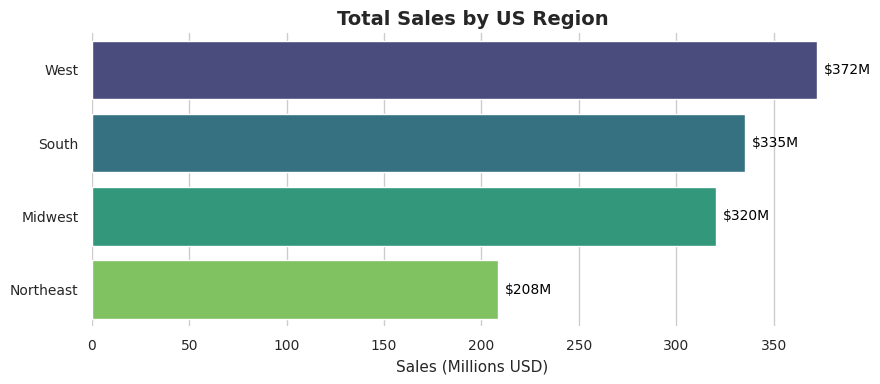

In [63]:
# 1. Aggregate and prepare data
region_sales = (
    df.groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
region_sales['revenue_millions'] = region_sales['revenue'] / 1e6

# 2. Set style
sns.set_theme(style='whitegrid')

# 3. Plot
plt.figure(figsize=(9, 4))
bar = sns.barplot(
    data=region_sales,
    y='us_region',
    x='revenue_millions',
    palette='viridis'
)

# 4. Add direct bar labels (e.g., "$142M")
for p in bar.patches:
    value = p.get_width()
    bar.annotate(
        f"${value:,.0f}M",
        (value, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=10,
        color='black',
        xytext=(5, 0),
        textcoords='offset points'
    )

# 5. Final formatting
plt.title('Total Sales by US Region', fontsize=14, weight='bold')
plt.xlabel('Sales (Millions USD)', fontsize=11)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**📊 Insights**

-  The West region leads significantly with $372M in total sales.

- South ($335M) and Midwest (320M) follow closely, showing consistent performance.

- The Northeast trails at $208M, indicating potential underperformance or limited market penetration.

- The spread suggests regional disparities in either demand, pricing strategy, or resource allocation.

**✅ Recommendations**

- Reinforce the West region with continued investment in sales infrastructure and high-performing SKUs.

- Expand high-potential programs (e.g., loyalty or bundling) in the South and Midwest to increase AOV.

- Investigate root causes for Northeast underperformance (distribution gaps, consumer behavior, price sensitivity).

- Test regionalized promotions in the Northeast and evaluate short-term ROI before deeper investment.



**🔹 10. Total Sales by State (Choropleth Map)**

    Goal: Visualize geographic distribution of sales to identify high-
    and low-performing states and uncover regional gaps.

    Chart: US choropleth map

    EDA Type: Univariate geospatial

    Structure:
    States shaded by total sales (in millions USD)
    Legend on the right showing sales scale (M USD)
    Hover tooltips display exact sales for each state
    Map scoped to USA for clear regional context

In [73]:
import plotly.express as px
import pandas as pd
import matplotlib.ticker as mtick

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df.groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6

# 2. Define bins and assign labels
max_revenue = state_sales['revenue_m'].max()
bins = [0, 50, 100, 150, 200, 250]
# Ensure bins are monotonically increasing and include the max revenue
bins = [b for b in bins if b < max_revenue] + [max_revenue + 1]
labels = ['<$50M', '$50–100M', '$100–150M', '$150–200M', '$200–250M', '>$250M'][:len(bins) - 1]
state_sales['sales_bracket'] = pd.cut(state_sales['revenue_m'], bins=bins, labels=labels, include_lowest=True)

# 3. Custom color scale for bins
color_map = {
    '<$50M': '#edf8fb',
    '$50–100M': '#b2e2e2',
    '$100–150M': '#66c2a4',
    '$150–200M': '#2ca25f',
    '$200–250M': '#006d2c',
    '>$250M': '#00441b'
}

# 4. Plot
fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='sales_bracket',
    scope='usa',
    color_discrete_map=color_map,
    hover_name='state',
    hover_data={'revenue_m': ':.2f'}
)

# 5. Layout updates
fig.update_layout(
    title_text='Total Sales by State<br><sup>Grouped by Sales Bracket (in Millions USD)</sup>',
    title_font_size=18,
    margin=dict(l=0, r=0, t=50, b=0),
    legend_title='Sales Bracket',
    legend=dict(
        x=1,
        y=0.5,
        xanchor='left',
        yanchor='middle'
    )
)

fig.show()

**📊 Insights**

- California is the only state in the $200M–$250M bracket, significantly outperforming all others.

- Most states fall below $50M, indicating widespread underutilization or low market penetration.

- A few mid-tier states like Illinois, Texas, and Florida show moderate sales performance ($50M–$150M).

**✅ Recommendations**

- Prioritize California for expansion, bundling, or exclusive promotions to capitalize on its high ROI.

- Identify growth levers in mid-tier states (e.g., targeted marketing, pricing optimization) to lift them into the $150M+ bracket.

- Run diagnostics on <$50M states to assess feasibility for exit, regional partnerships, or localized reactivation campaigns.

**🔹 11. Top 10 States by Revenue and Order Count**

    Goal: Identify highest revenue-generating states and compare their order volumes

    Chart: Two bar charts

    EDA Type: Multivariate

    Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

/tmp/ipython-input-4126792352.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4126792352.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




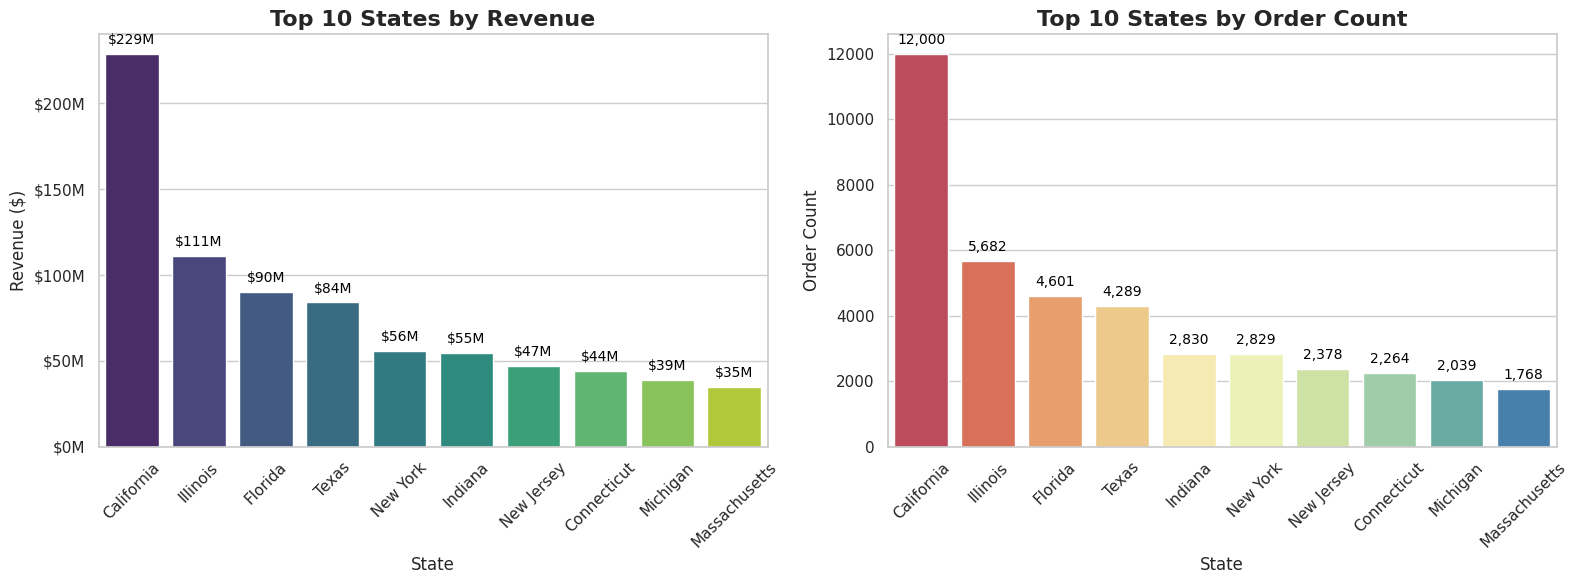

In [65]:
# Set modern theme
sns.set_theme(style="whitegrid")

# Aggregate and prepare data
state_stats = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    order_count=('order_number', 'count')
).reset_index()

top_10_revenue = state_stats.sort_values(by='revenue', ascending=False).head(10)
top_10_orders = state_stats.sort_values(by='order_count', ascending=False).head(10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# --- REVENUE BARPLOT ---
palette1 = sns.color_palette("viridis", len(top_10_revenue))
barplot1 = sns.barplot(data=top_10_revenue, x='state_name', y='revenue', palette=palette1, ax=ax1)

# Format bar labels and axis to show in millions
for p in barplot1.patches:
    value = int(p.get_height())
    ax1.annotate(f"${value/1e6:.0f}M",
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Format y-axis as millions with $ prefix
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

ax1.set_title('Top 10 States by Revenue', fontsize=16, weight='bold')
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, axis='y')

# --- ORDER COUNT BARPLOT ---
palette2 = sns.color_palette("Spectral", len(top_10_orders))
barplot2 = sns.barplot(data=top_10_orders, x='state_name', y='order_count', palette=palette2, ax=ax2)

for p in barplot2.patches:
    ax2.annotate(f"{int(p.get_height()):,}",
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

ax2.set_title('Top 10 States by Order Count', fontsize=16, weight='bold')
ax2.set_xlabel('State', fontsize=12)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, axis='y')

# Final layout
plt.tight_layout()
plt.show()

**📊 Insights**

- California dominates in both revenue ($229M) and order volume (12,000), contributing a disproportionately large share to total performance.

- Illinois, Florida, and Texas consistently appear in the top 4 for both metrics, suggesting strong and balanced sales ecosystems in these states.

- New York shows a revenue-order gap (5th in revenue, 6th in orders), implying higher average order value or premium sales activity.

- Indiana ranks higher in orders than revenue, indicating lower-value transactions or pricing inefficiencies.

- The bottom five states (NJ, CT, MI, MA) generate smaller volumes and revenue, potentially representing underutilized or lower-demand markets.

**✅ Recommendations**

- Double down on California through strategic promotions, loyalty programs, or regional partnerships to maintain dominance.

- Analyze New York’s pricing structure to identify high-margin products or customer segments driving revenue with fewer orders.

- Audit Indiana’s sales mix — consider upselling or bundling to increase per-order revenue.

- Explore market penetration strategies (ads, partnerships, reps) for NJ, CT, MI, and MA to drive volume or exit underperforming areas.

- Leverage revenue-to-order ratios to prioritize regions with scalable pricing power and repeat business potential.



**🔹 12. Average Profit Margin by Channel**

    Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

    Chart: Bar chart

    EDA Type: Bivariate

    Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

/tmp/ipython-input-15237516.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




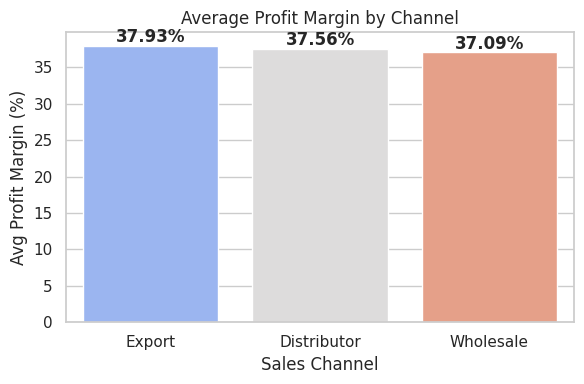

In [66]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

**📊 Insights**

- Export channel yields the highest average profit margin at 37.93%, outperforming all other channels.

- Distributor and Wholesale margins are slightly lower (37.56% and 37.09%, respectively), but all channels operate within a narrow range (~0.8% spread).

- The similar margin profiles suggest consistent pricing and cost structures across channels.

**✅ Recommendations**

- Prioritize Export for high-margin product lines or new launches to maximize profitability.

- Conduct a cost and pricing audit for the Wholesale channel to explore potential efficiency improvements or margin gains.

- Explore opportunities to differentiate channel strategies, since margins are tightly grouped — consider tailoring pricing, bundling, or service models for each.

**🔹 13. Top and Bottom 10 Customers by Revenue**

    Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

    Chart: Side-by-side horizontal bar charts

    EDA Type: Multivariate

    Structure: Left chart shows top 10 customers by revenue (in millions),
    right chart shows bottom 10 customers by revenue (in millions)

/tmp/ipython-input-2258585806.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2258585806.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2258585806.py:60: UserWarning:

Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-2258585806.py:60: UserWarning:

Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128315 (\N{DOWN-POINTING RED 

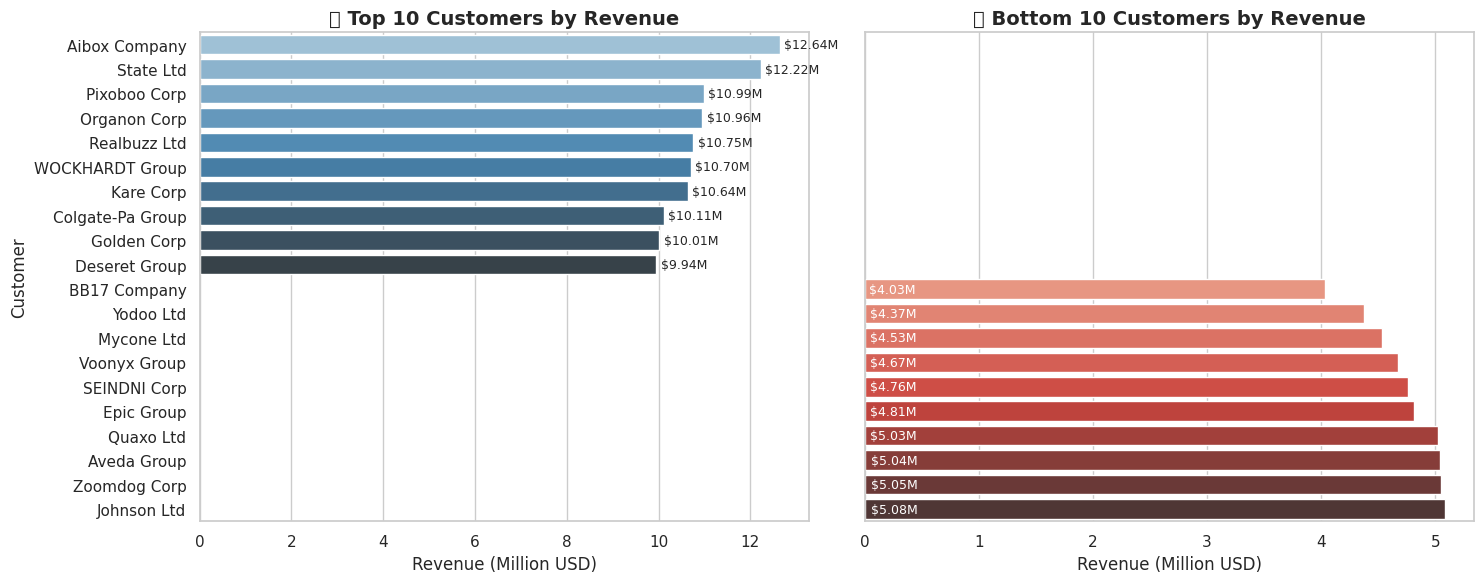

In [82]:
# ✅ Group by customer (or state) and compute total revenue
customer_revenue = df.groupby('customer_name')['revenue'].sum().reset_index()

# ✅ Get top 10 and bottom 10 customers by revenue
top_10_customers = customer_revenue.sort_values(by='revenue', ascending=False).head(10)
bottom_10_customers = customer_revenue.sort_values(by='revenue', ascending=True).head(10)

# ✅ Convert to millions for clarity
top_10_customers['revenue_m'] = top_10_customers['revenue'] / 1e6
bottom_10_customers['revenue_m'] = bottom_10_customers['revenue'] / 1e6

# ✅ Set Seaborn theme
sns.set_theme(style='whitegrid')

# ✅ Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# --- LEFT: Top 10 Customers ---
sns.barplot(
    ax=axes[0],
    data=top_10_customers,
    x='revenue_m',
    y='customer_name',
    palette='Blues_d'
)
axes[0].set_title("🔝 Top 10 Customers by Revenue", fontsize=14, weight='bold')
axes[0].set_xlabel("Revenue (Million USD)")
axes[0].set_ylabel("Customer")

# Annotate bars for Top 10 (right side)
for i, v in enumerate(top_10_customers['revenue_m']):
    axes[0].text(v + 0.1, i, f"${v:.2f}M", va='center', fontsize=9, ha='left')

# --- RIGHT: Bottom 10 Customers ---
barplot_bottom = sns.barplot(
    ax=axes[1],
    data=bottom_10_customers,
    x='revenue_m',
    y='customer_name',
    palette='Reds_d'
)
axes[1].set_title("🔻 Bottom 10 Customers by Revenue", fontsize=14, weight='bold')
axes[1].set_xlabel("Revenue (Million USD)")
axes[1].set_ylabel("")

# Annotate bars for Bottom 10 (left side, inside the bar)
for i, p in enumerate(barplot_bottom.patches):
    axes[1].text(
        p.get_x() + p.get_width() * 0.01,  # X position (1% from the start of the bar)
        p.get_y() + p.get_height() / 2, # Y position (center of the bar)
        f"${p.get_width():.2f}M",  # Text label showing revenue in millions
        va='center',  # Vertical alignment
        fontsize=9,
        color='white', # Set color to white for visibility inside the red bars
        ha='left'  # Horizontal alignment
    )


# Final layout
plt.tight_layout()
plt.show()

**📊 Insights: Top & Bottom 10 Customers by Revenue**

🔝 Top 10 Customers
- Aibox Company and State Ltd lead with $12.64M and $12.22M respectively.

- All top 10 generate over $9.9M, showing a strong Tier 1 customer base.

- These likely represent high-frequency buyers or strategic contracts.

🔻 Bottom 10 Customers
- Range from $4.03M to $5.08M in revenue.

- Decent volume overall, but likely infrequent or one-time buyers.

- Revenue drops off sharply after the top tier (~3x difference).

**💡 Recommendations**

Retain Top Performers
 - Offer loyalty perks, dedicated reps, and upsell opportunities.

Re-Engage Low Performers
- Run targeted campaigns to increase order frequency or volume.

Diversify Revenue Risk
- Avoid over-reliance on top accounts by nurturing mid-tier customers.

Align Sales Resources
- Focus efforts on high-value clients with proven ROI.

Share Insights Cross-Functionally
- Ensure marketing, ops, and finance align with customer value tiers.

**🔹 14. Customer Segmentation: Revenue vs. Profit Margin**
    
    Goal: Segment customers by total revenue and average profit margin, highlighting order volume

    Chart: Bubble chart (scatter plot with variable point sizes)

    EDA Type: Multivariate

    Structure: Scatter points sized by number of orders, plotting revenue vs. margin

In [72]:
import plotly.express as px

# Calculate total revenue, average margin, and order count for each customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'count')
).reset_index()

# Convert total revenue to millions for better visualization
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

# Create interactive bubble chart with smaller size range
fig = px.scatter(
    data_frame=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    color='orders',
    color_continuous_scale='Viridis',
    hover_name='customer_name',
    hover_data={
        'total_revenue_m': ':.2f',
        'avg_margin': ':.2f',
        'orders': True
    },
    title='Customer Segmentation: Revenue vs. Profit Margin',
    labels={
        'total_revenue_m': 'Total Revenue (Million USD)',
        'avg_margin': 'Avg Profit Margin (%)',
        'orders': 'Order Volume'
    },
    size_max=25,  # smaller max bubble size
    template='plotly_white'
)

# Update layout: clean, compact, and zoomed appropriately
fig.update_layout(
    title_font=dict(size=18, family='Arial Black'),
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)',
    margin=dict(t=60, l=40, r=20, b=40),
    xaxis=dict(
        range=[cust_summary['total_revenue_m'].min() - 0.3, cust_summary['total_revenue_m'].max() + 0.3],
        title='Total Revenue (Million USD)'
    ),
    yaxis=dict(
        range=[cust_summary['avg_margin'].min() - 1, cust_summary['avg_margin'].max() + 1],
        title='Avg Profit Margin (%)'
    ),
    legend_title='Order Volume'
)

# Show the final chart
fig.show()

**🔍 Insights**
- High-revenue clients (>$10M) cluster at ~35–38% margin — strong revenue, moderate profitability.

- Mid-tier clients ($6M–$9M) show wide margin variance (33–42%), ideal for segmentation.

- High-margin outliers exist with >42% margin and <$6M revenue — niche but highly profitable.

- Higher order volume aligns with moderate margins and revenue, indicating consistent but margin-sensitive buyers.

**✅ Recommendations**
- Target high-revenue, low-margin clients for pricing or cost optimizations.

- Grow share from high-margin, low-revenue clients — potential for high-ROI expansion.

- Segment customers by revenue, margin, and volume to tailor retention and upsell strategies.

- Audit operations for high-volume, low-margin accounts — improve service efficiency or renegotiate terms.



**🔹 15. Correlation Heatmap of Numeric Features**

    Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

    Chart: Correlation heatmap

    EDA Type: Multivariate

    Structure: Annotated heatmap with correlation coefficients for selected numeric columns

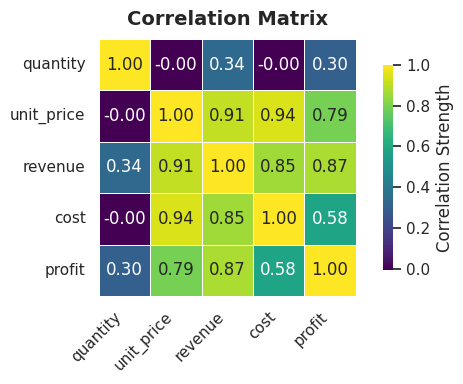

In [69]:
# Calculate correlation matrix
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']
corr = df[num_cols].corr()

# Set figure size
plt.figure(figsize=(6, 4))

# Heatmap using 'viridis' for high contrast & readability
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    square=True,
    linewidths=0.4,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Strength'}
)

# Title and formatting
plt.title("Correlation Matrix", fontsize=14, fontweight='bold', pad=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**🔍 Insights**
- Unit Price–Revenue Correlation (0.91): Strong positive link — higher pricing directly scales revenue.

- Unit Price–Cost Correlation (0.94): Indicates cost structure is highly sensitive to pricing — possibly due to product tiering or supplier dynamics.

- Profit–Revenue (0.87) and Profit–Unit Price (0.79): Profitability is more price-driven than volume-driven.

- Quantity shows low correlation with all metrics: Volume sold does not drive significant changes in revenue, cost, or profit — pointing to a margin-centric business model.

**✅ Recommendations**
- Focus on price optimization: Price levers have the most impact on both revenue and profit — fine-tune pricing models and discounts by segment.

- Monitor cost-price alignment: Since cost scales with price, validate supplier agreements and prevent margin erosion at higher tiers.

- Deprioritize volume-based campaigns: Efforts to increase order quantity may yield diminishing returns — focus on high-value customers instead.

- Segment customer value by margin, not quantity: Target retention and upsell efforts toward clients yielding strong profit margins rather than high transaction volume.

In [71]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)


# ✅ Conclusion
- Over the 2014–2018 period, XYZ Co's sales data revealed consistent patterns, strategic opportunities, and key performance gaps:

- Seasonality is stable, with revenue peaking in May, June, and August, and slumping in January–February. These cycles can be leveraged for better inventory, promotions, and staffing decisions.

- California dominates in revenue and order volume, far surpassing other states. The Northeast region significantly underperforms, representing a potential reactivation or exit target.

- Wholesale is the leading channel by volume, but Export offers the highest average profit margin, suggesting margin optimization through international expansion.

- Top 10 products and customers generate the majority of value, but there’s untapped potential in mid-tier segments with strong margin or volume performance.

- Unit price drives both revenue and profit more than quantity, reinforcing the importance of pricing strategy over volume-based campaigns.

- Together, these insights point toward a margin-centric growth model, where targeted pricing, regional focus, and product-channel alignment will drive scalable impact.